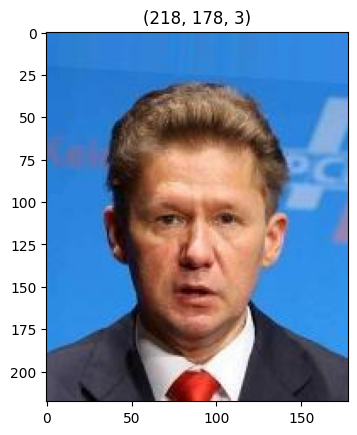

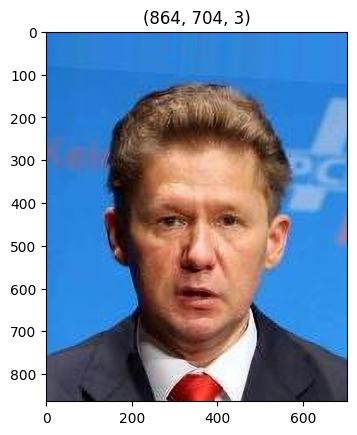

In [9]:
# Importing all the required packages and libraries
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

# Loading the image of the GFG Logo
img = cv2.imread("/content/celeb/000032.jpg")

image_plot = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title(image_plot.shape)
plt.imshow(image_plot)
plt.show()

# Running the SR model

# Model to preprocess the images


def preprocessing(img):
	imageSize = (tf.convert_to_tensor(image_plot.shape[:-1]) // 4) * 4
	cropped_image = tf.image.crop_to_bounding_box(
		img, 0, 0, imageSize[0], imageSize[1])
	preprocessed_image = tf.cast(cropped_image, tf.float32)
	return tf.expand_dims(preprocessed_image, 0)


# This is a model of Enhanced Super Resolution GAN Model
# The link given here is a model of ESRGAN model, we are using a pre-trained model
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)

# Model to employ the model


def srmodel(img):
	preprocessed_image = preprocessing(img) # Preprocess the LR Image
	new_image = model(preprocessed_image) # Runs the model
	# returns the size of the original argument that is given as input
	return tf.squeeze(new_image) / 255.0


# Plot the HR image
hr_image = srmodel(image_plot)
plt.title(hr_image.shape)
plt.imshow(hr_image)
plt.show()
